In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    path = '/kaggle/input/breast-cancer/breast-cancer-wisconsin-data_data.csv'
    data = pd.read_csv(path)
    print("File read successfully.")
except Exception as e:
    print(f"File read failed with error: {str(e)}")

File read successfully.


In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
if missing_values.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing values summary:")
    print(missing_values)

Missing values summary:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimensi

In [5]:
data = data.drop(['Unnamed: 32','id'],axis=1)

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
print("The dataset has {} rows and {} columns.".format(data.shape[0], data.shape[1]))

The dataset has 569 rows and 31 columns.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
grouped = data.groupby(['diagnosis']).agg(['mean','median'])

# Select specific columns of interest from the grouped data
columns_of_interest = [
    'radius_mean', 'texture_mean', 'perimeter_mean',
    'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]
# Select the mean and median values for the specified columns
selected_columns = grouped.loc[:, columns_of_interest]

In [10]:
data.rename(columns={"concave points_mean": "concave_points_mean", "concave points_worst":"concave_points_worst"}, inplace=True)

**Key Features in Breast Cancer Diagnosis**  

**Essential Parameters:**
* Radius, Texture, Perimeter, Area, Smoothness, Concavity, Compactness
* Importance: Improve diagnostic accuracy and differentiate between benign and malignant tumors.
* Sources: (Allada et al., 2021); (Kopans, 1986).  

**Additional Key Features:**
* Concave Points and Symmetry
* Role: Enhance classification accuracy of breast masses.
* Sources: (Analysis of Breast Cancer dataset, 2020); (Mashudi et al., 2021).  

**Fractal Dimension:**
* Significance: Crucial for cytologic diagnosis and characterizing mammographic masses.
* Effectiveness: Complements other shape factors for better classification accuracy.
* Sources: (Einstein et al., 1998); (Shanmugavadivu et al., 2016).

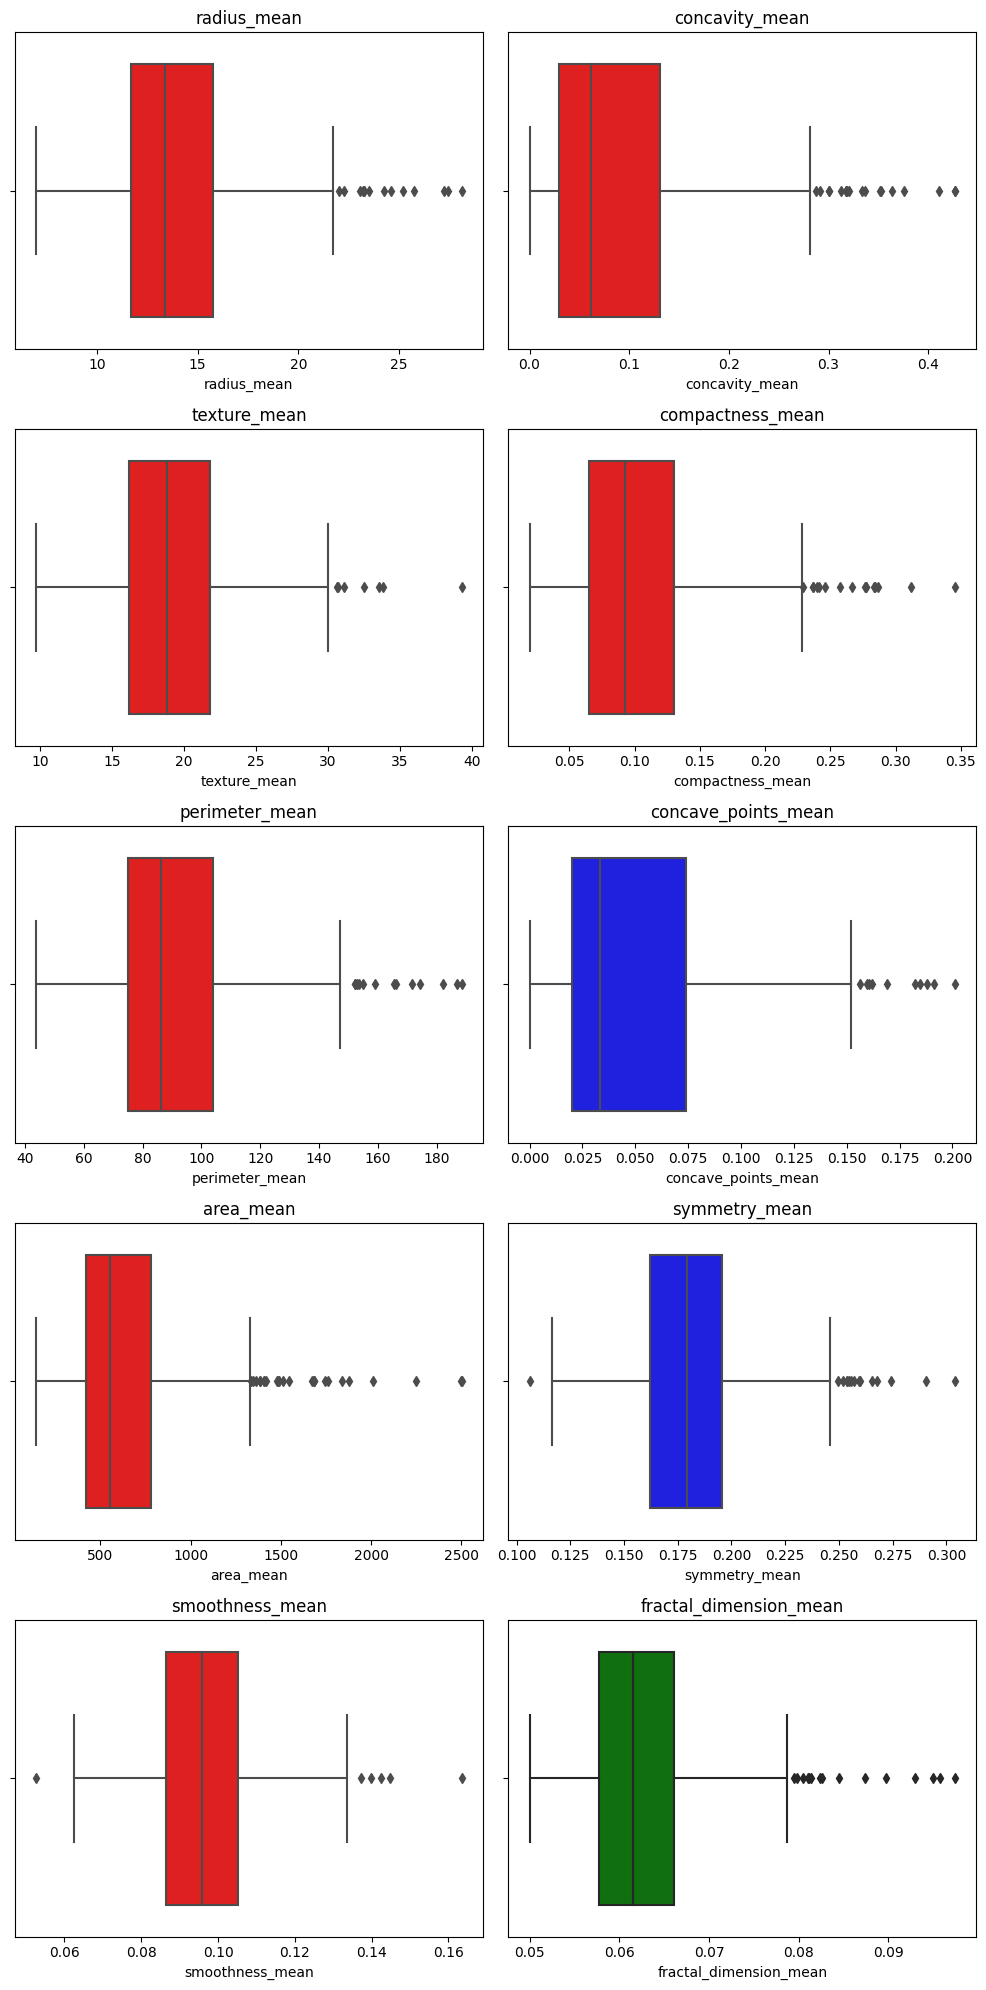

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))  # 5 rows, 2 columns for the subplots

# Essential Parameters (High Importance) - Red Color
features_essential = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                      'concavity_mean', 'compactness_mean']

# Additional Key Features (Moderate Importance) - Blue Color
features_additional = ['concave_points_mean', 'symmetry_mean']

# Fractal Dimension (Specific Importance) - Green Color
features_specific = ['fractal_dimension_mean']

# Combine features
all_features = features_essential + features_additional + features_specific

# Assign colors
colors = ['red'] * len(features_essential) + ['blue'] * len(features_additional) + ['green'] * len(features_specific)

# Create boxplots
for i, feature in enumerate(all_features):
    sns.boxplot(x=data[feature], ax=axes[i % 5, i // 5], color=colors[i])
    axes[i % 5, i // 5].set_title(feature)

plt.tight_layout()
plt.show()
plt.savefig('boxplots_grid.png')
plt.close()  

**Red Boxplots (Essential Features):**
* Radius_mean: High median value with a relatively wide interquartile range (IQR), and presence of many outliers.
* Texture_mean: Similar to radius_mean with a wide IQR and outliers, suggesting variability across tumors.
* Perimeter_mean: Again, a wide IQR and many outliers, indicative of variance in tumor sizes.
* Area_mean: Displays a wide range of values with several outliers, highlighting significant differences in tumor areas.
* Smoothness_mean: Less variability than size-related features but still with outliers.
* Concavity_mean: Wide IQR and many outliers indicate varied tumor concavity.
* Compactness_mean: High variability and several outliers suggest differences in tumor density.  

**Blue Boxplot (Additional Key Feature):**
* Concave_points_mean: Notably high variability and numerous outliers, indicating that the number of concave points varies significantly across tumors.
* Symmetry_mean: Shows a narrower IQR compared to other features, suggesting more consistency in tumor symmetry.  

**Green Boxplot (Feature with Specific Importance):**
* Fractal_dimension_mean: Also demonstrates a narrower IQR, indicating less variability in this measure of tumor roughness or complexity.

**Clinical Relevance:**  
The essential features (in red) like size and concavity appear to have the most variability and could potentially be the most informative for distinguishing between different types of breast tumors, which aligns with their designation as "essential" in the analysis.

In [14]:
relevant_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                     'concavity_mean', 'compactness_mean', 'concave_points_mean', 'symmetry_mean', 
                     'fractal_dimension_mean']
selected_data = data[relevant_features]

Q1 = selected_data.quantile(0.25)
Q3 = selected_data.quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (selected_data < (Q1 - 1.5 * IQR)) | (selected_data > (Q3 + 1.5 * IQR))

outliers_count = outlier_condition.sum()
outliers_count

radius_mean               14
texture_mean               7
perimeter_mean            13
area_mean                 25
smoothness_mean            6
concavity_mean            18
compactness_mean          16
concave_points_mean       10
symmetry_mean             15
fractal_dimension_mean    15
dtype: int64

In [15]:
# Collect the indices of outliers for each feature
outlier_indices = []
for feature in relevant_features:
    feature_outliers = selected_data[outlier_condition[feature]]
    outlier_indices.extend(feature_outliers.index.tolist())

# Create a list of unique indices
unique_outlier_indices = list(set(outlier_indices))

# Examine the outlier status of other features at these indices
outlier_data = selected_data.loc[unique_outlier_indices]
outlier_data_outliers = (outlier_data < (Q1 - 1.5 * IQR)) | (outlier_data > (Q3 + 1.5 * IQR))

# Calculate the number of multi-feature outliers for each case
multi_feature_outliers_counts = outlier_data_outliers.sum(axis=1)

# Count cases with outliers in multiple features and the number of outliers in those cases
multi_feature_outliers_case_count = (multi_feature_outliers_counts > 1).sum()
multi_feature_outliers_cases = multi_feature_outliers_counts[multi_feature_outliers_counts > 1]

multi_feature_outliers_case_count, multi_feature_outliers_cases

(28,
 0      2
 258    4
 3      4
 521    3
 265    2
 393    2
 9      2
 400    2
 152    3
 164    3
 563    2
 180    5
 567    2
 68     2
 202    5
 461    5
 78     5
 82     6
 339    3
 212    5
 351    2
 352    6
 108    7
 236    3
 369    2
 503    3
 504    2
 122    8
 dtype: int64)

This result shows the number of cases in our dataset that have multiple outliers across the selected features, and the count of outliers in each of these cases:

The first number (28) indicates that there are a total of 28 distinct cases in our dataset. These cases have outliers in at least two of the selected features.
The following list shows the total number of outliers in each case. For example, the first case (index 0) has two outliers, the case with index 258 has four outliers, and so on.
In summary, this analysis reveals that certain cases in our dataset have multiple outliers across different features, indicating that these cases might be significantly different from others and may require special attention. We will save these cases separately to later assess how well our machine learning model predicts them.

In [16]:
multi_feature_outliers_indices = multi_feature_outliers_cases.index
multi_feature_outlier_cases_df = data.loc[multi_feature_outliers_indices]
multi_feature_outlier_cases_df.to_csv('multi_feature_outlier_cases.csv', index=False)

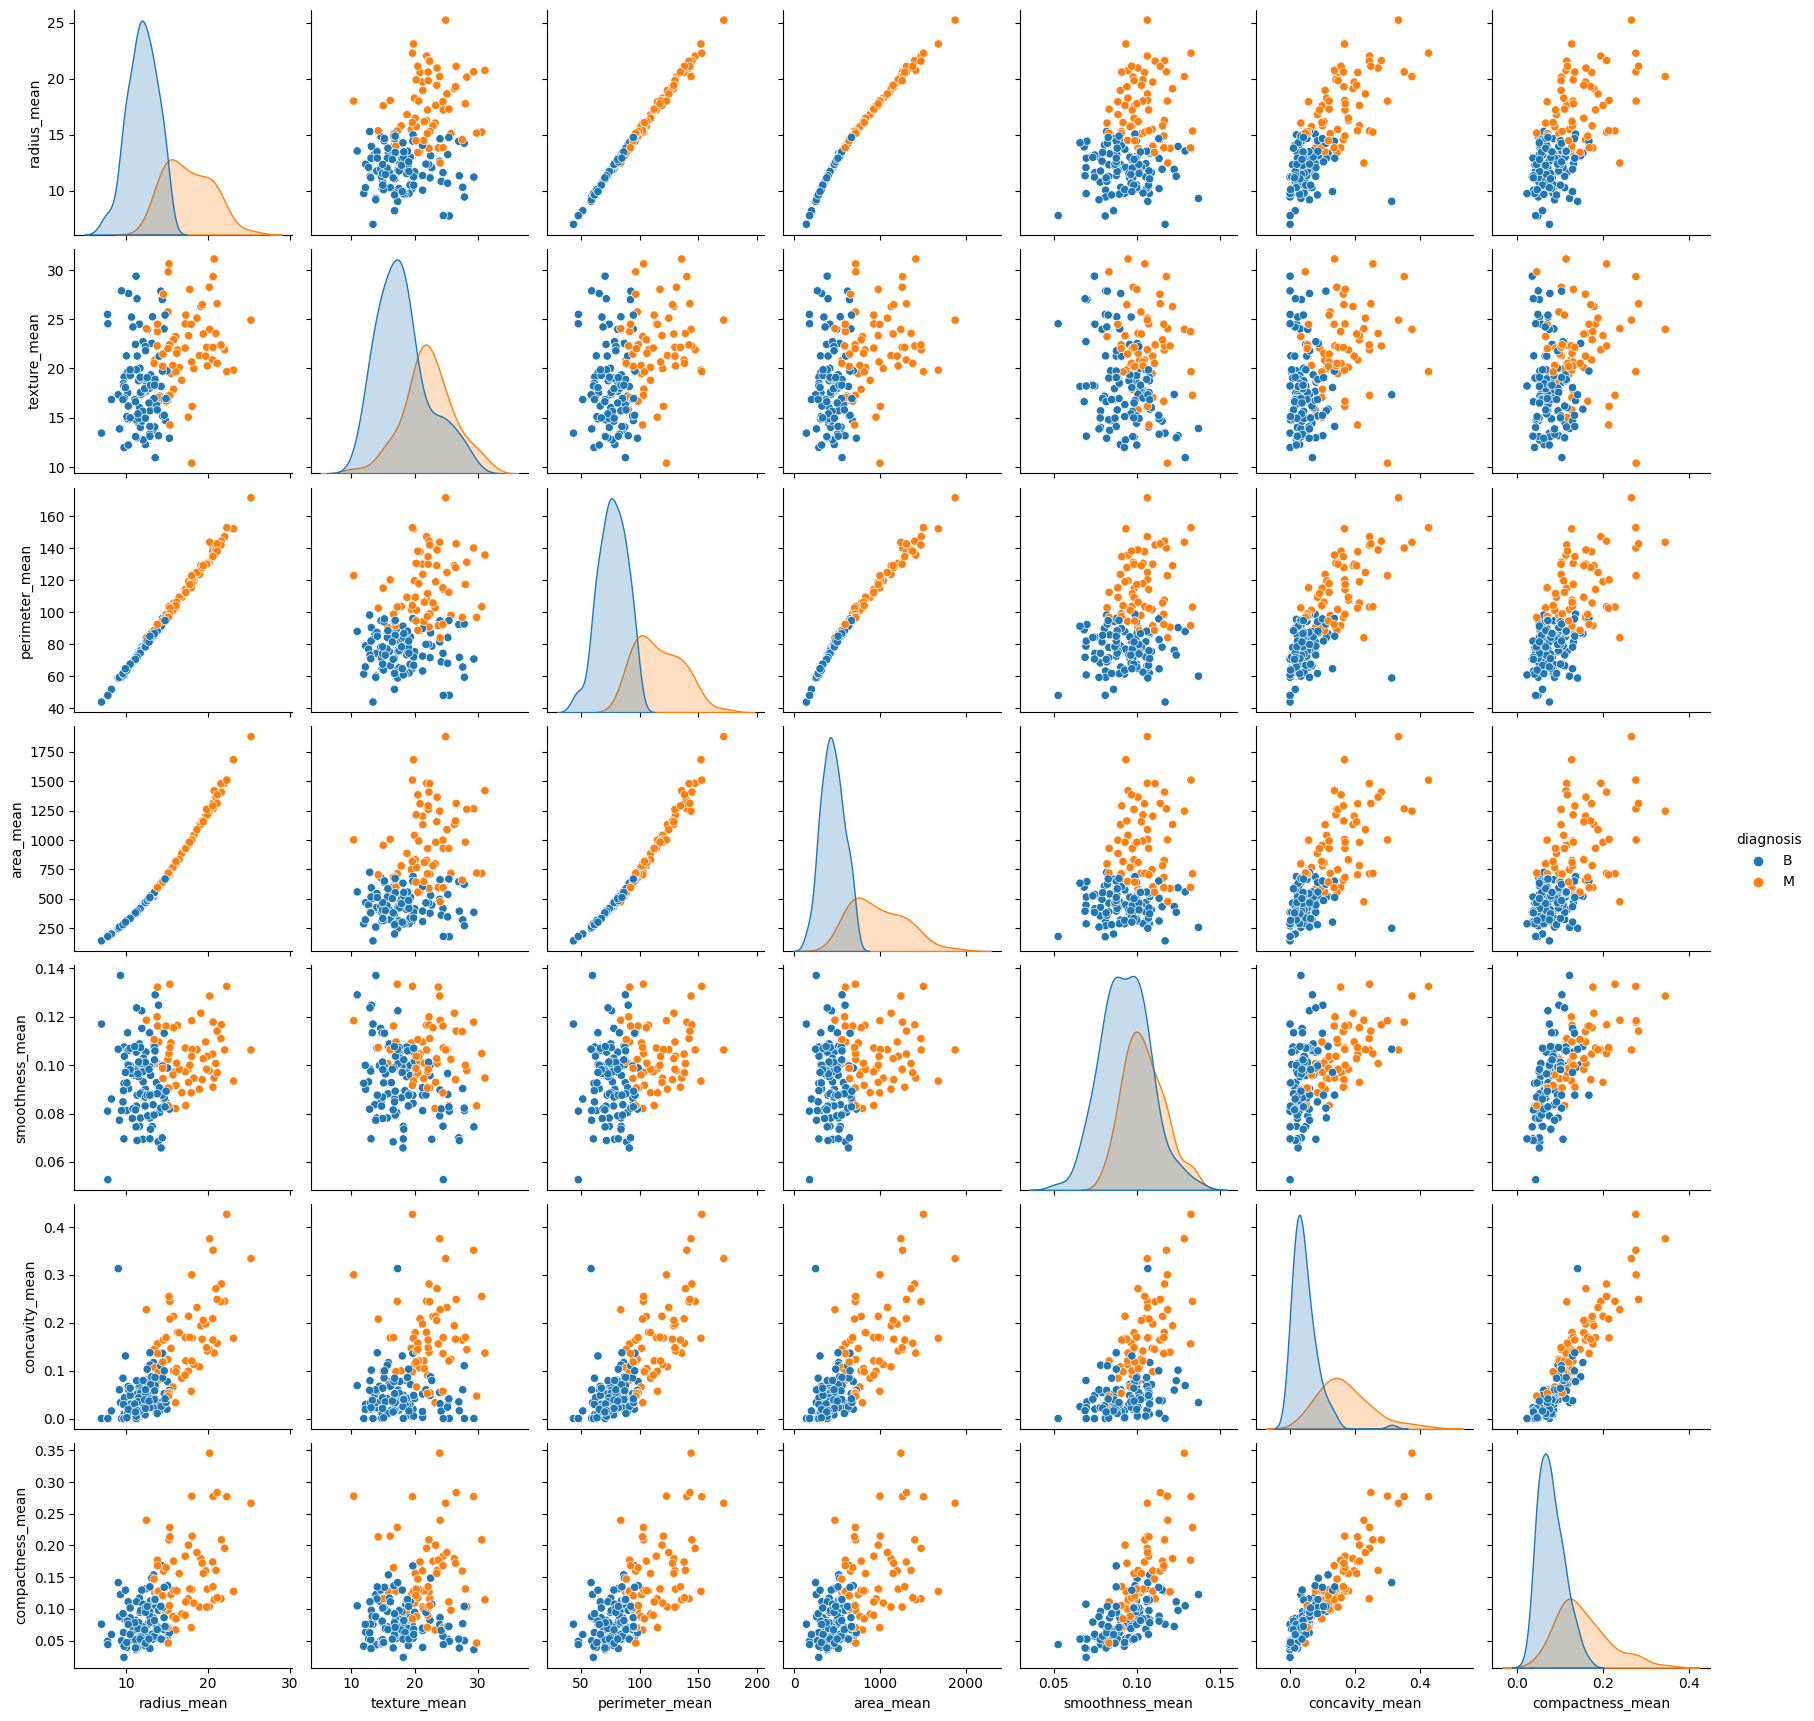

In [17]:
# Use only a subset of data to avoid overplotting
sampled_data = data.sample(frac=0.3, random_state=42)  # Adjust frac to your needs

# Generate the pairplot for the selected features
pairplot_fig = sns.pairplot(sampled_data[features_essential + ['diagnosis']], hue='diagnosis')
plt.show()
pairplot_fig.savefig('/kaggle/working/pairplot.png')
plt.close()


**Observations from the pairplot:**

**Size-Related Features:** Features such as radius_mean, perimeter_mean, and area_mean display a distinct separation between benign and malignant cases. Malignant tumors tend to have higher values for these features, which is indicative of larger and potentially more aggressive tumors.  

**Feature Correlations:** There's a strong positive correlation between features that are geometrically related, like radius_mean and perimeter_mean. This suggests that **as the size of the tumor increases, so does its perimeter and area, which aligns with expected geometric principles.**

**Texture and Smoothness:** The texture (potentially represented by texture_mean) does not seem to distinguish as clearly between benign and malignant as the size-related features do, given the greater overlap in the scatter plots. Similarly, smoothness_mean shows some overlap between the classes but also hints that **malignant tumors might have a tendency towards higher values.**

**Shape Features:** Concavity_mean and compactness_mean demonstrate that **malignant tumors often have more irregular shapes and are less uniform,** as indicated by higher values in these features for the malignant class

**Distribution Patterns:** Looking at the density plots on the diagonal, malignant tumors (orange) have a wider spread in most features, implying a higher variance in the malignant class compared to the benign class. 

**Potential Outliers:** There are several data points that stand out from the main clusters, especially in the area_mean feature, **suggesting the presence of outliers which could represent unusual cases.**. Hence, we will measure our ML models on this unusual cases. 

**Clinical Relevance:** Clinically, **this visualization underscores the importance of size, shape, and texture characteristics in differentiating between benign and malignant breast tumors. Larger, less uniform, and more irregular tumors are more likely to be malignant.**

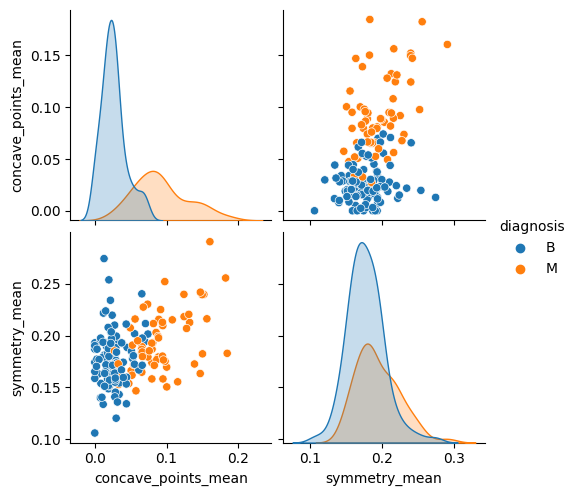

In [19]:
# Do the same for features_additional
sns.pairplot(sampled_data[features_additional + ['diagnosis']], hue='diagnosis')
pairplot_fig.savefig('/kaggle/working/pairplot2.png')
plt.show()

**Top Left (KDE for concave_points_mean):**
* The kernel density estimation (KDE) suggests that the concave_points_mean feature has a different distribution for the two classes.
* The class labeled '0' shows a peak at a lower value of concave_points_mean, suggesting that benign tumors typically have fewer concave points on average.
* The class labeled '1' has a distribution that extends towards higher values, implying that **malignant tumors may have more concave points on average.**

**Bottom Right (KDE for symmetry_mean):**
* The KDE for symmetry_mean shows more overlap between the two classes than concave_points_mean, indicating that symmetry_mean might be less discriminative on its own.
* Both classes have distributions that are somewhat similar in shape for symmetry_mean, but the class '1' has a slightly wider spread, suggesting more variability in the symmetry of malignant tumors.  

**Bottom Left (Scatter Plot for concave_points_mean vs. symmetry_mean):**
* This scatter plot shows a relationship between concave_points_mean and symmetry_mean for each class.
* There is some degree of separation between the two classes, with class '1' generally showing higher values of concave_points_mean.
* The scatter plot does not indicate a strong linear relationship between the two features; instead, there seems to be a pattern where higher values of concave_points_mean are associated with class '1'.  

**Class Distributions:**
* The class '0' appears to be more tightly grouped for both features, suggesting that benign tumors have a more consistent shape and size.
* **The class '1' is more spread out, particularly in concave_points_mean, which might be an indicator of the aggressiveness or irregularity associated with malignant tumors.**  

**Clinical Implications:**
* The number of concave points (concavity) and the symmetry of the cells can be important characteristics when analyzing breast cancer tumors.
* A higher number of concave points may correlate with more aggressive tumor characteristics, which is consistent with the data distribution seen in the KDE and scatter plot for class '1'.  

In [20]:
from sklearn.utils import resample

M = data[data['diagnosis'] == 'M']
B = data[data['diagnosis'] == 'B']

# Upsample the cancer cases
M_upsampled = resample(M, replace=True, n_samples=len(B), random_state=42)
data = pd.concat([B, M_upsampled]).reset_index(drop=True)

# Convert the 'diagnosis' column to binary format
data['diagnosis'] = (data['diagnosis'] == 'M').astype(int)

# Check the new distribution
data['diagnosis'].value_counts()

diagnosis
0    357
1    357
Name: count, dtype: int64

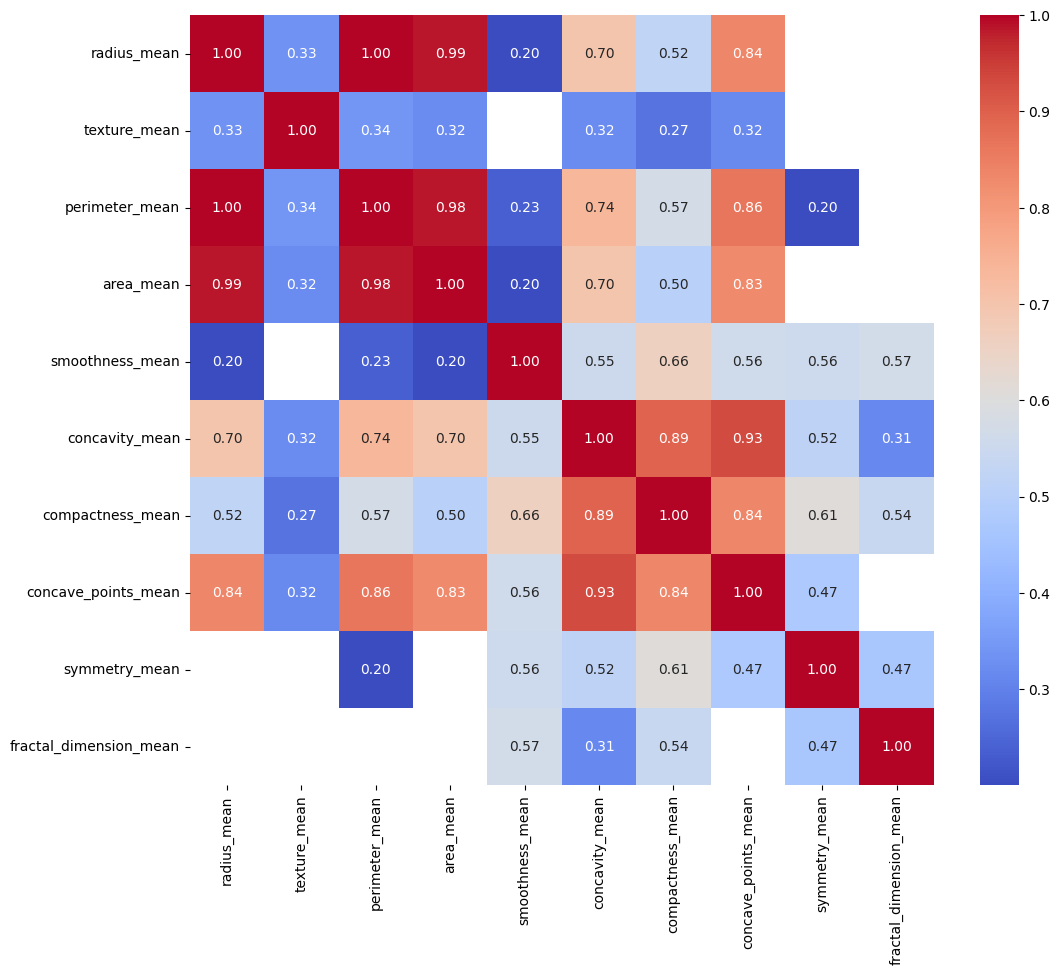

In [22]:
relevant_data = data[relevant_features]
corr_matrix = relevant_data.corr()

# Create a heatmap showing features with correlation values greater than 0.2
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            mask=(corr_matrix <= 0.2))
plt.savefig('/kaggle/working/heatmap.png')  # Save the figure, not the Axes
plt.show()


The heatmap visualization indicates strong correlations among the selected features. High correlation means that some features are strongly related and may contain redundant information. This could lead to multicollinearity issues in machine learning models.  

To address this, we can consider the following approaches:

**Feature Selection:**:  We might choose to remove some of the highly correlated features to train our model with fewer but more effective predictors.  
**Principal Component Analysis (PCA):** This technique reduces the dimensionality of our data, decreasing multicollinearity and potentially improving our model's generalization.  
**Regularization:** Techniques such as Ridge (L2 regularization) or Lasso (L1 regularization) can mitigate multicollinearity by penalizing the model for complexity and pushing coefficients of redundant features towards zero.  

We'll proceed with implementing Principal Component Analysis to enhance our model's performance.

In [23]:
from sklearn.model_selection import train_test_split
X = data.drop('diagnosis', axis=1)  
y = data['diagnosis']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define a hyperparameter space to search. 
# For Logistic Regression, we often tune the regularization strength 'C' and the type 'penalty'.
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2']
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(solver='liblinear')  

# Initialize the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit it to the data
logreg_cv.fit(X_train_pca, y_train)

# Retrieve the best parameters and the best score
best_params = logreg_cv.best_params_
best_score = logreg_cv.best_score_

best_params, best_score


({'C': 0.08858667904100823, 'penalty': 'l2'}, 0.97989898989899)

In [26]:
from sklearn.metrics import classification_report

# Use the best-found hyperparameters to make predictions on the test set
y_pred = logreg_cv.predict(X_test_pca)

# Calculate precision, recall, and accuracy
logistic_regression_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print(logistic_regression_report)


              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98       117
   Malignant       0.99      0.96      0.97        98

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



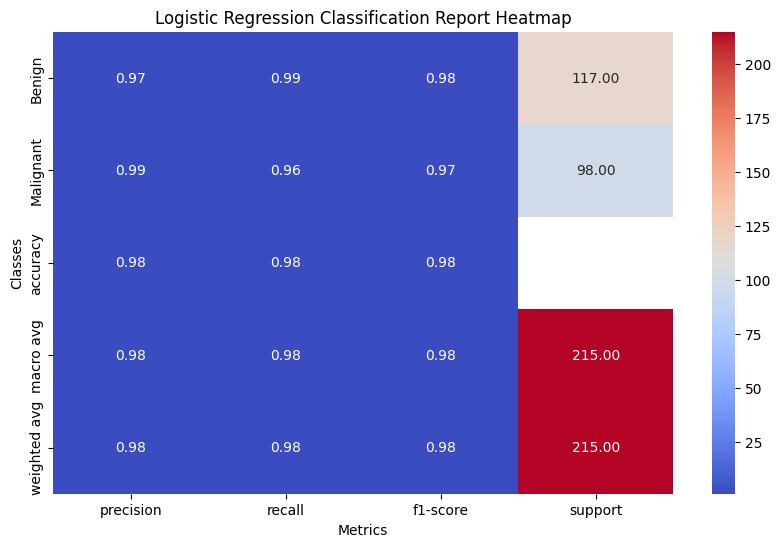

In [28]:
from sklearn.metrics import classification_report

# Generate the classification report with output_dict=True to get the report in dictionary format
logistic_regression_report_dict = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'], output_dict=True)

# Convert the report dictionary to a DataFrame
logistic_regression_report_df = pd.DataFrame(logistic_regression_report_dict).transpose()

accuracy_val = logistic_regression_report_df.loc['accuracy', 'precision'] 
logistic_regression_report_df.loc['accuracy', 'precision':'f1-score'] = accuracy_val
logistic_regression_report_df.loc['accuracy', 'support'] = np.nan

# Create a heatmap from the DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(logistic_regression_report_df, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Logistic Regression Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

plt.savefig('logistic_regression_classification_report_heatmap.png')
plt.close() 


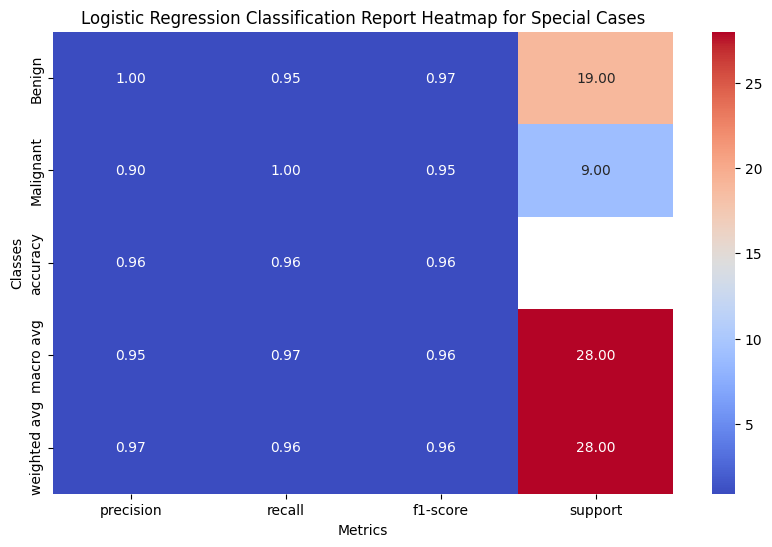

In [30]:
# Extract the feature data for the special cases, ensuring the features match 'X'
special_cases_features = data.loc[multi_feature_outliers_indices, X.columns]

# Standardize and apply PCA transformation to the special cases features
special_cases_features_scaled = scaler.transform(special_cases_features)
special_cases_features_pca = pca.transform(special_cases_features_scaled)

# Extract the target data for the special cases
special_cases_target = data.loc[multi_feature_outliers_indices, 'diagnosis']

# Make predictions on the special cases
special_cases_pred = logreg_cv.predict(special_cases_features_pca)

# Generate the classification report
special_cases_report = classification_report(special_cases_target, special_cases_pred, target_names=['Benign', 'Malignant'])
special_cases_report_dict = classification_report(special_cases_target, special_cases_pred, target_names=['Benign', 'Malignant'], output_dict=True)

# Convert the report dictionary to a DataFrame
special_cases_report_df = pd.DataFrame(special_cases_report_dict).transpose()

accuracy_val = special_cases_report_df.loc['accuracy', 'precision']  
special_cases_report_df.loc['accuracy', 'precision':'f1-score'] = accuracy_val
special_cases_report_df.loc['accuracy', 'support'] = np.nan

# Create a heatmap from the DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(special_cases_report_df, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Logistic Regression Classification Report Heatmap for Special Cases')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()
plt.savefig('logistic_regression_classification_report_heatmap_special_cases.png')
plt.close()

In [31]:
from sklearn.svm import SVC

# Define a hyperparameter space to search. For SVM, we can tune C, gamma, and the kernel type.
param_grid_svm = {
    'C': np.logspace(-4, 4, 20),
    'gamma': np.logspace(-4, 4, 20),
    'kernel': ['rbf', 'linear']
}

# Initialize the SVM model
svm = SVC()

# Initialize the GridSearchCV object
svm_cv = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')

# Fit it to the data
svm_cv.fit(X_train_pca, y_train)

# Retrieve the best parameters and the best score
best_params_svm = svm_cv.best_params_
best_score_svm = svm_cv.best_score_

best_params_svm, best_score_svm

({'C': 545.5594781168514, 'gamma': 0.012742749857031334, 'kernel': 'rbf'},
 0.985979797979798)

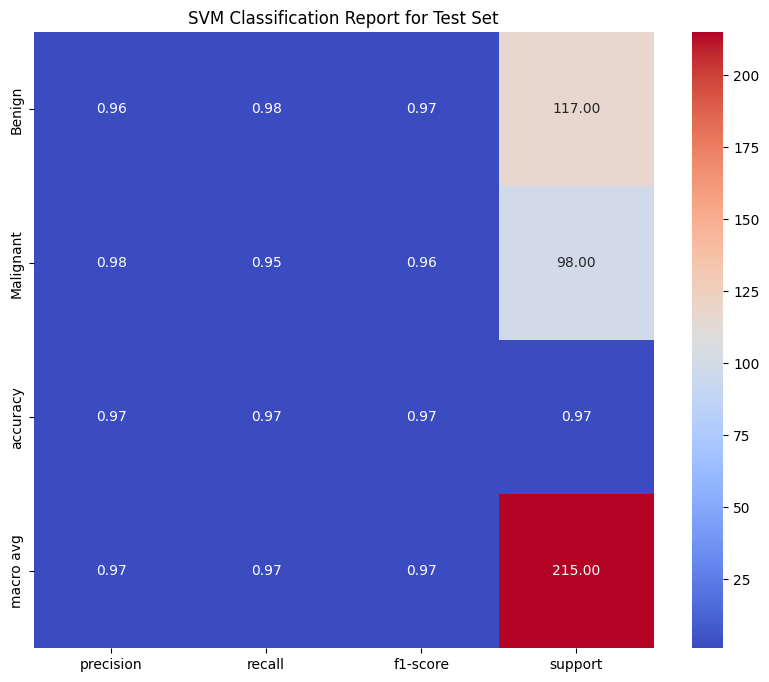

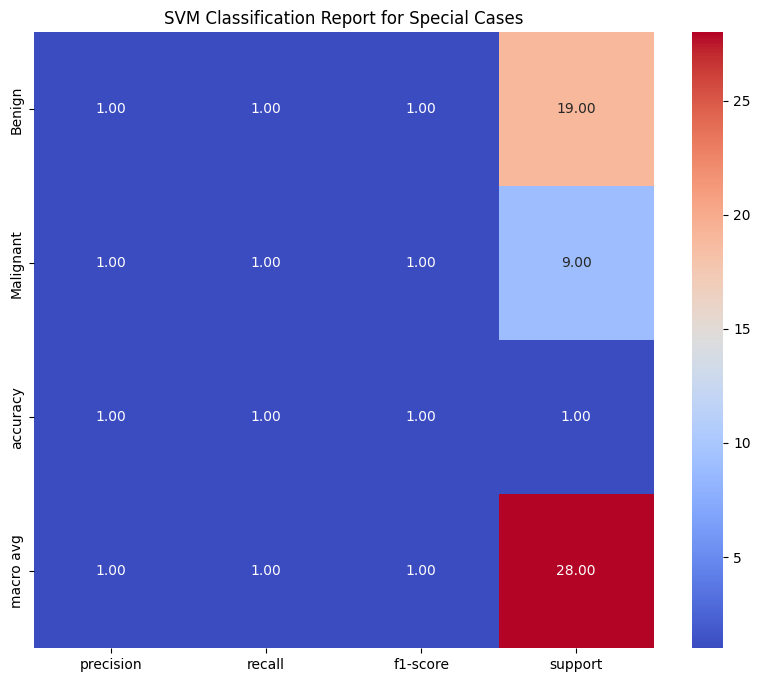

In [33]:
# Predict on the test set
y_pred_svm = svm_cv.predict(X_test_pca)

# Print the classification report for the test set
report_svm = classification_report(y_test, y_pred_svm, target_names=['Benign', 'Malignant'])
report_test_df = pd.DataFrame(classification_report(y_test, y_pred_svm, target_names=['Benign', 'Malignant'], output_dict=True)).transpose()
# Save the test set report as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(report_test_df.iloc[:-1, :], annot=True, fmt='.2f', cmap='coolwarm')
plt.title('SVM Classification Report for Test Set')
plt.show()
plt.savefig('svm_classification_report_test_set.png')
plt.close()


# Predict on the special cases
special_cases_pred_svm = svm_cv.predict(special_cases_features_pca)

# Print the classification report for the special cases
special_cases_report_svm = classification_report(special_cases_target, special_cases_pred_svm, target_names=['Benign', 'Malignant'])
report_special_cases_df = pd.DataFrame(classification_report(special_cases_target, special_cases_pred_svm, target_names=['Benign', 'Malignant'], output_dict=True)).transpose()
plt.figure(figsize=(10, 8))
sns.heatmap(report_special_cases_df.iloc[:-1, :], annot=True, fmt='.2f', cmap='coolwarm')
plt.title('SVM Classification Report for Special Cases')
plt.savefig('svm_classification_report_special_cases.png')
plt.show()
plt.close()


{'n_neighbors': 3} 0.9779797979797978


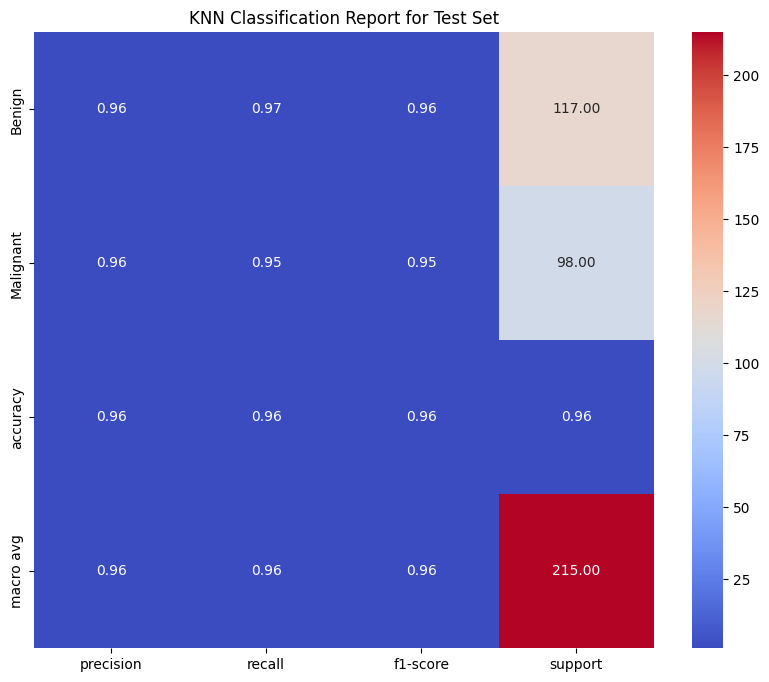

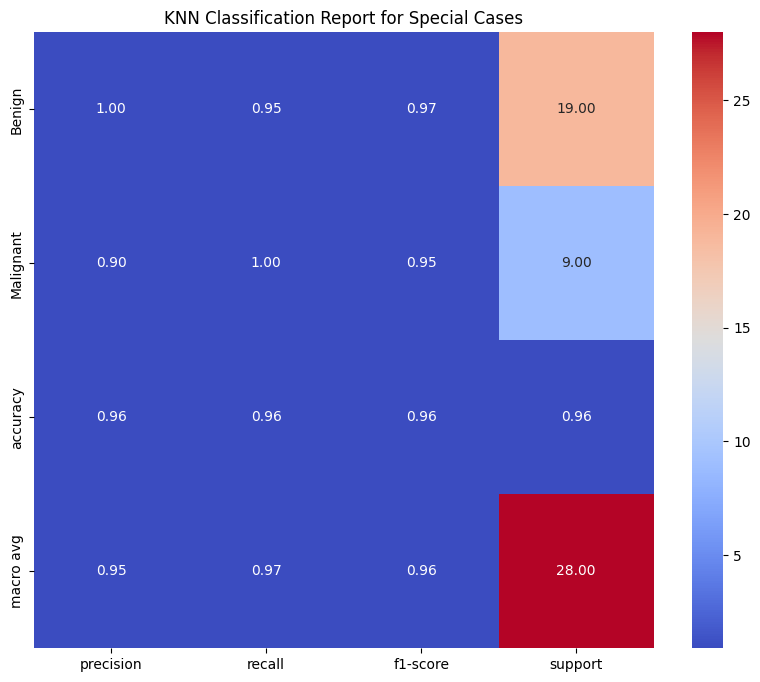

In [36]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': range(1, 31)
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize the GridSearchCV object
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

# Fit it to the data
knn_cv.fit(X_train_pca, y_train)

# Retrieve the best parameters and the best score
best_params_knn = knn_cv.best_params_
best_score_knn = knn_cv.best_score_

print(best_params_knn, best_score_knn)

# Predict on the test set
y_pred_knn = knn_cv.predict(X_test_pca)
report_test_knn = classification_report(y_test, y_pred_knn, target_names=['Benign', 'Malignant'], output_dict=True)
report_test_knn_df = pd.DataFrame(report_test_knn).transpose()
#report_knn = classification_report(y_test, y_pred_knn, target_names=['Benign', 'Malignant'])
#print("Classification Report for Test Set (KNN):\n", report_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(report_test_knn_df.iloc[:-1, :], annot=True, fmt='.2f', cmap='coolwarm')
plt.title('KNN Classification Report for Test Set')
plt.savefig('knn_classification_report_test_set.png')
plt.show()
plt.close()

# Predict on the special cases
special_cases_pred_knn = knn_cv.predict(special_cases_features_pca)
# Generate the classification report for the special cases
report_special_knn = classification_report(special_cases_target, special_cases_pred_knn, target_names=['Benign', 'Malignant'], output_dict=True)
report_special_knn_df = pd.DataFrame(report_special_knn).transpose()
plt.figure(figsize=(10, 8))
sns.heatmap(report_special_knn_df.iloc[:-1, :], annot=True, fmt='.2f', cmap='coolwarm')
plt.title('KNN Classification Report for Special Cases')
plt.savefig('knn_classification_report_special_cases.png')
plt.show()
plt.close()


{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100} 0.9779595959595959


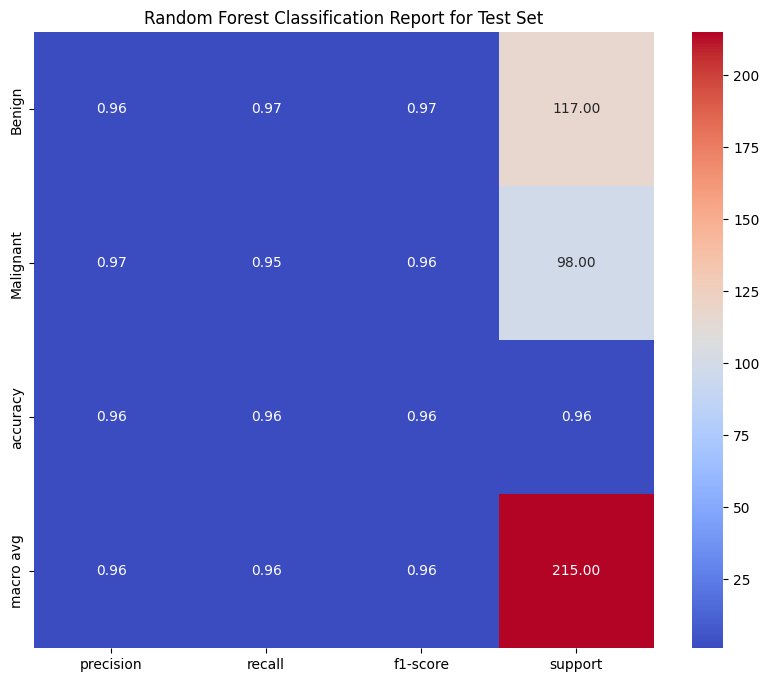

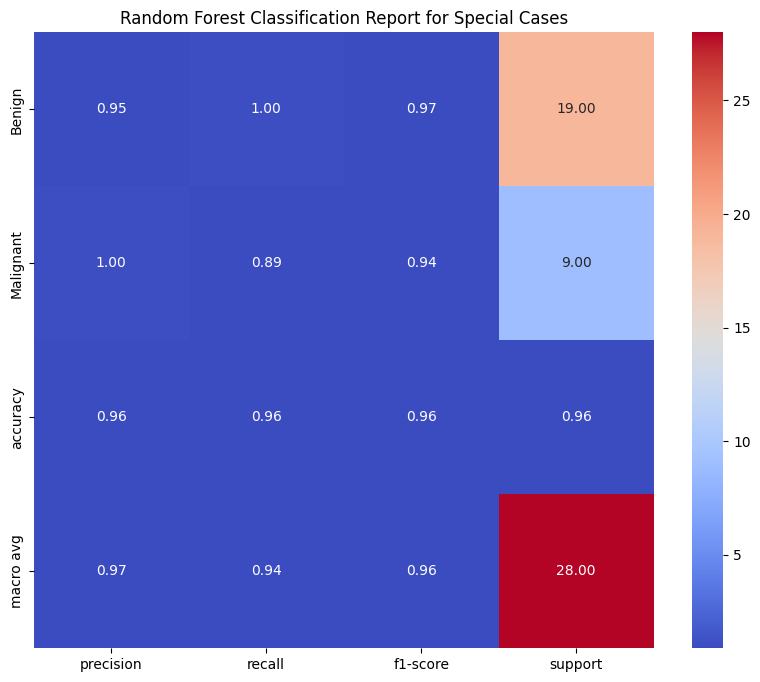

In [38]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

# Define a hyperparameter space to search. For Random Forest, we can tune n_estimators, max_depth, etc.
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Initialize the GridSearchCV object
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit it to the data
rf_cv.fit(X_train_pca, y_train)

best_params_rf = rf_cv.best_params_
best_score_rf = rf_cv.best_score_

print(best_params_rf, best_score_rf)

# Evaluate Random Forest on the test set
y_pred_rf = rf_cv.predict(X_test_pca)
# Generate the classification report for the test set
report_test_rf = classification_report(y_test, y_pred_rf, target_names=['Benign', 'Malignant'], output_dict=True)
report_test_rf_df = pd.DataFrame(report_test_rf).transpose()

# Create and save the heatmap for the test set
plt.figure(figsize=(10, 8))
sns.heatmap(report_test_rf_df.iloc[:-1, :], annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Random Forest Classification Report for Test Set')
plt.show()
plt.savefig('rf_classification_report_test_set.png')
plt.close()

# Evaluate Random Forest on the special cases
special_cases_pred_rf = rf_cv.predict(special_cases_features_pca)
report_special_rf = classification_report(special_cases_target, special_cases_pred_rf, target_names=['Benign', 'Malignant'], output_dict=True)
report_special_rf_df = pd.DataFrame(report_special_rf).transpose()
plt.figure(figsize=(10, 8))
sns.heatmap(report_special_rf_df.iloc[:-1, :], annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Random Forest Classification Report for Special Cases')
plt.show()
plt.savefig('rf_classification_report_special_cases.png')
plt.close()